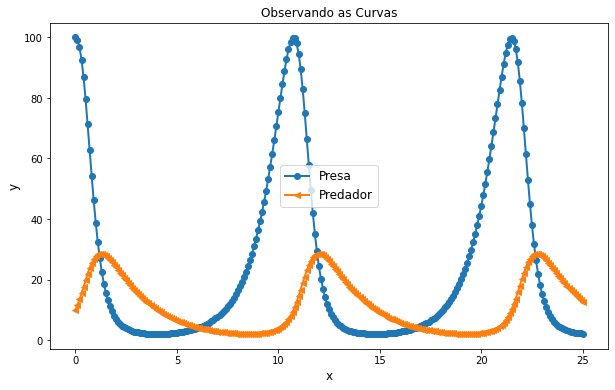

In [ ]:
import numpy as np
from scipy import linalg as lin
from scipy import integrate as odesolver
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *
import time

def euler_sys(x,h,F,Y0):
    n = len(x);
    m = len(Y0);
    Y = np.zeros((m,n));
    Y[:,0] = Y0;

    for i in np.arange(1,n):
        # y[i] = y[i-1] + h*f(x[i-1],y[i-1]);
        Y[:,i] = Y[:,i-1] + h*F(x[i-1],Y[:,i-1]);

    return Y;

def rk2_sys(x,h,F,Y0):
    n = len(x);
    m = len(Y0);
    Y = np.zeros((m,n));
    Y[:,0] = Y0;

    for i in np.arange(1,n):
        k1 = F(x[i-1],Y[:,i-1]);
        k2 = F(x[i-1]+h,Y[:,i-1]+h*k1);

        Y[:,i] = Y[:,i-1] + (h/2)*(k1+k2);

    return Y;

def rk4_sys(x,h,F,Y0):
    n = len(x);
    m = len(Y0);
    Y = np.zeros((m,n));
    Y[:,0] = Y0;

    for i in np.arange(1,n):
        k1 = F(x[i-1],Y[:,i-1]);
        k2 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k1);
        k3 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k2);
        k4 = F(x[i-1]+h,Y[:,i-1]+h*k3);

        Y[:,i] = Y[:,i-1] + (h/6)*(k1+2*(k2+k3)+k4);

    return Y;

def calc_erro_2(x,h,y,f_exa):
    e = np.abs(y-f_exa(x));
    e = e**2;
    erro = np.sqrt(h*np.sum(e))

    return erro;

# Exercício Lista - Parte Prática exercício 1
# Sistema
# Y = [y1,y2] e F = [y1(alpha1-beta1y2),y2(-alpha2+beta2y1)]; alpha1 = 1, beta1 = 0.1, alpha2 = 0.5, beta2 = 0.02
# alpha1 --> Taxa de crescimendo da população de presas; beta1 --> Taxa de decrescimento da população de predadores
# alpha2 --> Taxa de crescimento da população de predadores; beta2 --> Taxa de decrescimento da população de presas

alpha1 = 1; beta1 = 0.1; alpha2 = 0.5; beta2 = 0.02;
F = lambda x,Y: np.array([Y[0]*(alpha1-beta1*Y[1]),Y[1]*(-alpha2+beta2*Y[0])]);

Y0 = np.array([100,10])
h = 0.1;
n = int((25-0)/h);
x = np.linspace(0,25,n+1,endpoint=True);

Y_rk2 = rk2_sys(x,h,F,Y0);

# Vamos plotar os resultados
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,Y_rk2[0,:],label = 'Presa',linewidth = 2,marker='o')
plt.plot(x,Y_rk2[1,:],label = 'Predador',linewidth = 2,marker='<')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Observando as Curvas') 
plt.legend(fontsize='large') 
plt.show()